#### Problem Statement
Build decision tree model to predict survival of **Titanic** based on certain parameters

By using following columns build a model to predict if person would survive or not,
* Pclass
* Sex
* Age
* Fare  

Calculate score of your model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
X = df.drop('Survived',axis='columns')
y = df.Survived

In [5]:
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [6]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
X.Sex = X.Sex.map({'male': 1, 'female': 2})

In [8]:
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [9]:
X['Pclass'].isna().sum()

0

In [10]:
X['Sex'].isna().sum()

0

In [11]:
X['Age'].isna().sum()

177

In [12]:
X.Age = X.Age.fillna(X.Age.mean())

In [13]:
X['Age'].isna().sum()

0

In [14]:
X['Fare'].isna().sum()

0

In [15]:
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [16]:
X.isna().sum().sum()

0

In [17]:
y.isna().sum().sum()

0

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [20]:
len(X_train)

712

In [21]:
len(X_test)

179

In [22]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
model.score(X_test,y_test)

0.8044692737430168

In [25]:
y_predicted = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[97, 20],
       [15, 47]])

Text(69.0, 0.5, 'Truth')

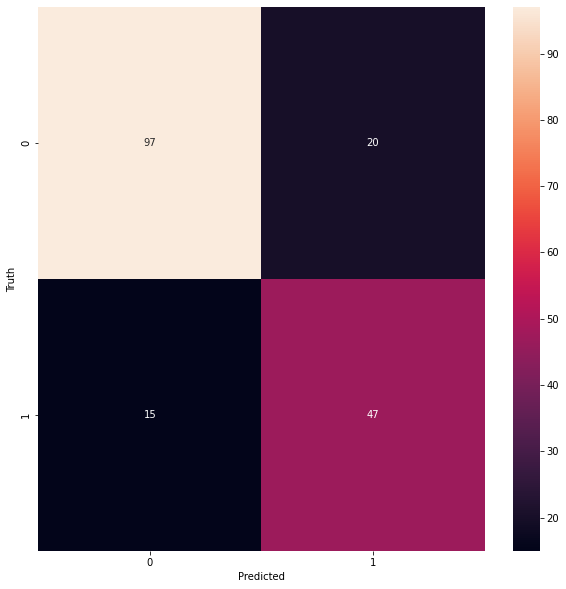

In [30]:
import seaborn as sn
%matplotlib inline
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')